In [1589]:
import pandas as pd
import numpy as np
import requests
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

## Assessing Data

In [1590]:
df_customerdemo = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerDemographic')

In [1591]:
df_customerdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
1,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0
2,1888,Sibyl,Scholtz,Female,67,2002-01-26,Food Chemist,Health,Mass Customer,N,NaN,Yes,1.0
3,3435,Stevena,Allcock,Female,80,2002-01-15,Senior Editor,NaN,Affluent Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0
4,2858,Benedicto,Radki,Male,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,testâ testâ«,Yes,1.0


In [1592]:
df_customerdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [1593]:
df_customerdemo.sort_values(by='DOB')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
3912,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
3911,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3910,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
3909,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,NaN,No,NaN
3996,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3997,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3998,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN


In [1594]:
df_customerdemo.isnull().any()

customer_id                            False
first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                     True
job_title                               True
job_industry_category                   True
wealth_segment                         False
deceased_indicator                     False
default                                 True
owns_car                               False
tenure                                  True
dtype: bool

In [1595]:
df_customerdemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [1596]:
df_customerdemo.duplicated().any()

False

In [1597]:
df_customerdemo[df_customerdemo.duplicated()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


In [1598]:
df_customerdemo['customer_id'].max()

4000

In [1599]:
df_NewCustomer = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='NewCustomerList')

In [1600]:
df_trans =  pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='Transactions')

In [1601]:
df_NewCustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1938-06-08,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.67,0.8375,1.046875,0.889844,1,1,1.718750
1,Morly,Genery,Male,69,1938-06-09,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.50,0.5000,0.625000,0.531250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1938-08-05,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.91,0.9100,0.910000,0.910000,1,1,1.718750
3,Lucine,Stutt,Female,64,1938-08-30,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.05,1.3125,1.312500,1.312500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1938-08-31,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.66,0.6600,0.825000,0.825000,4,4,1.703125


In [1602]:
df_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 13,total_sales
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,NaN,NaN


In [1603]:
df_trans.duplicated().any()

False

In [1604]:
df_trans.shape

(20000, 15)

In [1605]:
df_trans['customer_id'].max()

5034

In [1606]:
df_trans['customer_id'].min()

1

In [1607]:
df_trans.isnull().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order                True
order_status               False
brand                       True
product_line                True
product_class               True
product_size                True
list_price                 False
standard_cost               True
product_first_sold_date     True
Unnamed: 13                 True
total_sales                 True
dtype: bool

In [1608]:
df_customer_add = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerAddress')

In [1609]:
df_customer_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [1610]:
df_customer_add.duplicated().any()

False

In [1611]:
df_customer_add.isnull().any()

customer_id           False
address               False
postcode              False
state                 False
country               False
property_valuation    False
dtype: bool

In [1612]:
df_customer_add.state

0       New South Wales
1       New South Wales
2                   QLD
3       New South Wales
4                   VIC
             ...       
3994                VIC
3995                QLD
3996                NSW
3997                QLD
3998                NSW
Name: state, Length: 3999, dtype: object

In [1613]:
df_customer_add.shape

(3999, 6)

In [1614]:
df_customer_add['customer_id'].max()

4003

In [1615]:
df_customer_add['customer_id'].min()

1

In [1616]:
df_customer_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


## Cleaning Data

### •	Completeness: 
1. There are some columns contain null values: customer_id, name, Job Title, Job industry category and so on in Customer Demographic Data set; online orders, brand, product line, product class, product size, standard cost and product first sold date in Transaction dataset.

<p>Mitigation: If those null values are a small portion of data and do not have a significance effect on data exploration, drop those null values. If those null values are key values that may affect the data prediction, replace null values with average or mode depend on data distribution.

In [1617]:
df_customerdemo_new = df_customerdemo.copy()
df_trans_new = df_trans.copy()
df_customer_add_new = df_customer_add.copy()

In [1618]:
df_customerdemo_new.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

There are too many null in job_title and job industry, wo choose to drop them first and wait for further info

In [1619]:
df_customerdemo_new.dropna(subset=['job_title', 'job_industry_category','default'],inplace = True)

In [1620]:
df_customerdemo_new.isnull().sum()

customer_id                             0
first_name                              0
last_name                              80
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                     0
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
default                                 0
owns_car                                0
tenure                                  0
dtype: int64

In [1621]:
df_trans_new.isnull().sum()

transaction_id                 0
product_id                     0
customer_id                    0
transaction_date               0
online_order                 360
order_status                   0
brand                        197
product_line                 197
product_class                197
product_size                 197
list_price                     0
standard_cost                197
product_first_sold_date      197
Unnamed: 13                20000
total_sales                20000
dtype: int64

In [1622]:
df_trans_new.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 13,total_sales
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,NaN,NaN


In [1623]:
df_trans_new.drop(columns = ['Unnamed: 13','total_sales','online_order'],inplace = True)

In [1624]:
df_trans_new

,transaction_id,product_id,customer_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


<p> 2. There are additional customer_ids in Transactions dataset, but not in Customer Address sheet. The maximum number for customer_id in Transaction dataset is 5034; however, in Customer Address dataset, the maximum number is 4003. 
<p> Mitigation:  It looks like the dataset is not from same period. To keep same period for the data set, drop rows with customer_id that greater than the Customer Address’s maximum customer_id


In [1625]:
df_trans_new.drop(df_trans_new[df_trans_new.customer_id >= 4003].index,inplace = True)

In [1626]:
df_trans_new.customer_id.max()

3500

In [1627]:
df_customer_add_new.drop(df_customer_add_new[df_customer_add_new.customer_id >= 3500].index, inplace = True)

In [1628]:
df_customer_add_new.customer_id.max()

3499

### Consistency: 
<p>1. State Name is not consistent among three data sets. (ex. New South wales in Customer address dataset, NSW in other datasets)
<p> Mitigation: Keep abbreviation of New south wales in customer address sheet. Replace all New South Wales to NSW 

In [1629]:
df_customer_add_new.state = df_customer_add_new.state.replace('New South Wales','NSW')

In [1630]:
df_customer_add_new.state = df_customer_add_new.state.replace('Victoria','VIC')

In [1631]:
df_customer_add_new.state

0       NSW
1       NSW
2       QLD
3       NSW
4       VIC
       ... 
3490    NSW
3491    NSW
3492    VIC
3493    VIC
3494    QLD
Name: state, Length: 3495, dtype: object

<p>Customer_id’s Datatype is not consistent (ex. Float in Customer Demographic dataset, but in customer address, the datatype is integer)
<p>Mitigation:  Change all customer_id datatype to int and remove all non-numeric data.


In [1632]:
df_customerdemo_new.customer_id.astype(int)

1         66
6       2296
8       3949
9       1402
10      1519
        ... 
3907    1243
3908     658
3909    2413
3911    1092
3912     720
Name: customer_id, Length: 2710, dtype: int64

## Find high value customer

### Find age distribution

In [1633]:
df_customerdemo_new.DOB

1      2002-03-11
6      2002-01-01
8      2001-12-19
9      2001-12-08
10     2001-11-30
          ...    
3907   1953-08-09
3908   1944-01-24
3909   1943-08-11
3911   1935-08-22
3912   1931-10-23
Name: DOB, Length: 2710, dtype: datetime64[ns]

In [1634]:
now = pd.Timestamp('now')

In [1635]:
#transfer DOB to Age
df_customerdemo_new['DOB'] = pd.to_datetime(df_customerdemo_new['DOB'])    # 1
df_customerdemo_new['DOB'] = df_customerdemo_new['DOB'].where(df_customerdemo_new['DOB'] < now, df_customerdemo_new['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df_customerdemo_new['age'] = (now - df_customerdemo_new['DOB']).astype('<m8[Y]')    # 3
df_customerdemo_new

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
1,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0,18.0
6,2296,Nathalia,Sanger,Female,16,2002-01-01,Geologist IV,Retail,Affluent Customer,N,ï½ï½¨(Â´âï½â©,No,1.0,18.0
8,3949,Costa,Sleightholm,Male,24,2001-12-19,Web Designer IV,Manufacturing,High Net Worth,N,-0.5,Yes,1.0,18.0
9,1402,Hillier,Andraud,Male,58,2001-12-08,Assistant Professor,Telecommunications,Mass Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0,18.0
10,1519,Marwin,Jeyness,Male,35,2001-11-30,Administrative Assistant IV,Telecommunications,High Net Worth,N,â©testâ©,Yes,1.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,"""'",No,8.0,67.0
3908,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0,76.0
3909,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0,77.0
3911,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0,85.0


In [1636]:
# Create Age bracket
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_customerdemo_new['agerange'] = pd.cut(df_customerdemo_new.age, bins, labels = labels,include_lowest = True)
df_customerdemo_new

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,agerange
1,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0,18.0,18-29
6,2296,Nathalia,Sanger,Female,16,2002-01-01,Geologist IV,Retail,Affluent Customer,N,ï½ï½¨(Â´âï½â©,No,1.0,18.0,18-29
8,3949,Costa,Sleightholm,Male,24,2001-12-19,Web Designer IV,Manufacturing,High Net Worth,N,-0.5,Yes,1.0,18.0,18-29
9,1402,Hillier,Andraud,Male,58,2001-12-08,Assistant Professor,Telecommunications,Mass Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0,18.0,18-29
10,1519,Marwin,Jeyness,Male,35,2001-11-30,Administrative Assistant IV,Telecommunications,High Net Worth,N,â©testâ©,Yes,1.0,18.0,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,"""'",No,8.0,67.0,60-69
3908,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0,76.0,70+
3909,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0,77.0,70+
3911,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0,85.0,70+


In [1637]:
df_age = df_customerdemo_new['agerange'].value_counts()
df_age

40-49    896
18-29    553
30-39    525
50-59    479
60-69    253
70+        4
Name: agerange, dtype: int64

### Old age distribution

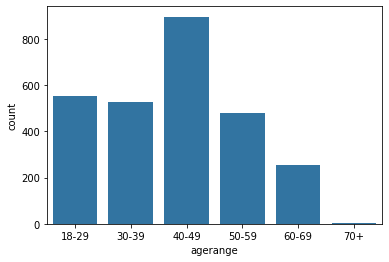

In [1638]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_customerdemo_new, x= 'agerange',color = base_color)

Most customers are between 40-49 age

### New age distribution

In [1639]:
df_NewCustomer_new = df_NewCustomer.copy()

In [1640]:
now = pd.Timestamp('now')
df_NewCustomer_new['DOB'] = pd.to_datetime(df_NewCustomer_new['DOB'])    # 1
df_NewCustomer_new['DOB'] = df_NewCustomer_new['DOB'].where(df_NewCustomer_new['DOB'] < now, df_NewCustomer_new['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df_NewCustomer_new['age'] = (now - df_NewCustomer_new['DOB']).astype('<m8[Y]')    # 3
df_NewCustomer_new

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
0,Chickie,Brister,Male,86,1938-06-08,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.67,0.8375,1.046875,0.889844,1,1,1.718750,82.0
1,Morly,Genery,Male,69,1938-06-09,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.50,0.5000,0.625000,0.531250,1,1,1.718750,82.0
2,Ardelis,Forrester,Female,10,1938-08-05,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.91,0.9100,0.910000,0.910000,1,1,1.718750,82.0
3,Lucine,Stutt,Female,64,1938-08-30,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,1.05,1.3125,1.312500,1.312500,4,4,1.703125,82.0
4,Melinda,Hadlee,Female,34,1938-08-31,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.66,0.6600,0.825000,0.825000,4,4,1.703125,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,NaT,Paralegal,Financial Services,Affluent Customer,N,No,...,Australia,7,1.05,1.0500,1.050000,1.050000,996,996,0.374000,NaN
996,Burk,Wortley,Male,22,NaT,Senior Sales Associate,Health,Mass Customer,N,No,...,Australia,10,0.88,0.8800,1.100000,0.935000,997,997,0.357000,NaN
997,Melloney,Temby,Female,17,NaT,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,Australia,2,0.81,1.0125,1.012500,1.012500,997,997,0.357000,NaN
998,Dickie,Cubbini,Male,30,NaT,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,Australia,2,1.07,1.3375,1.337500,1.136875,997,997,0.357000,NaN


In [1641]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_NewCustomer_new['agerange'] = pd.cut(df_NewCustomer_new.age, bins, labels = labels,include_lowest = True)
df_NewCustomer_new

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,agerange
0,Chickie,Brister,Male,86,1938-06-08,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.67,0.8375,1.046875,0.889844,1,1,1.718750,82.0,70+
1,Morly,Genery,Male,69,1938-06-09,Structural Engineer,Property,Mass Customer,N,No,...,11,0.50,0.5000,0.625000,0.531250,1,1,1.718750,82.0,70+
2,Ardelis,Forrester,Female,10,1938-08-05,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5,0.91,0.9100,0.910000,0.910000,1,1,1.718750,82.0,70+
3,Lucine,Stutt,Female,64,1938-08-30,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1,1.05,1.3125,1.312500,1.312500,4,4,1.703125,82.0,70+
4,Melinda,Hadlee,Female,34,1938-08-31,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9,0.66,0.6600,0.825000,0.825000,4,4,1.703125,82.0,70+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,NaT,Paralegal,Financial Services,Affluent Customer,N,No,...,7,1.05,1.0500,1.050000,1.050000,996,996,0.374000,NaN,NaN
996,Burk,Wortley,Male,22,NaT,Senior Sales Associate,Health,Mass Customer,N,No,...,10,0.88,0.8800,1.100000,0.935000,997,997,0.357000,NaN,NaN
997,Melloney,Temby,Female,17,NaT,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,2,0.81,1.0125,1.012500,1.012500,997,997,0.357000,NaN,NaN
998,Dickie,Cubbini,Male,30,NaT,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,2,1.07,1.3375,1.337500,1.136875,997,997,0.357000,NaN,NaN


In [1642]:
df_NewCustomer_new.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value', 'age', 'agerange'],
      dtype='object')

In [1643]:
df_age_new = df_NewCustomer_new['agerange'].value_counts()
df_age_new

40-49    220
18-29    196
50-59    175
60-69    171
30-39    111
70+      110
Name: agerange, dtype: int64

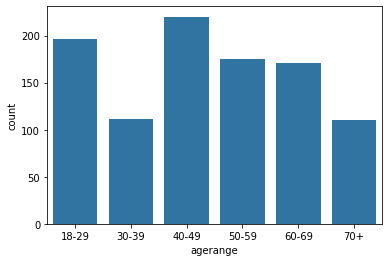

In [1644]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_NewCustomer_new, x= 'agerange',color = base_color)

## Relationship between Age and Tenure

(10, 70)

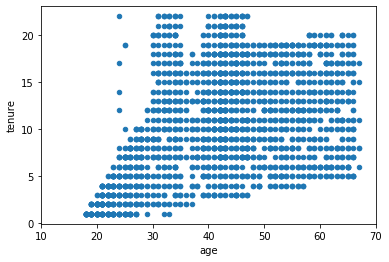

In [1645]:
df_customerdemo_new.plot(x = 'age', y = 'tenure',kind = 'scatter')
plt.xlim(10,70)

there is no relatioship between age and tenure

In [1646]:
df_trans_new

,transaction_id,product_id,customer_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


## High Margin 

In [1647]:
df_trans_new['margin'] = ((df_trans_new['list_price'] - df_trans_new['standard_cost'])/df_trans_new['list_price']) *100 
df_trans_new_sort = df_trans_new.sort_values(by ='margin',ascending=False)


In [1648]:
df_trans_new_sort['margin'].mean()

44.61024241935779

In [1649]:
bin_edges = [0,30,70,100]
bin_names = ['low margin','medium margin','high margin']
df_trans_new['level'] = pd.cut(df_trans_new['margin'],bin_edges,labels = bin_names)
df_trans_new

,transaction_id,product_id,customer_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin,level
0,1,2,2950,2017-02-25,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,24.996503,low margin
1,2,3,3120,2017-05-21,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,81.404467,high margin
2,3,37,402,2017-10-16,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,86.126027,high margin
3,4,88,3135,2017-08-31,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,68.200858,medium margin
4,5,78,787,2017-10-01,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,59.809664,medium margin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,39.999801,medium margin
19996,19997,41,127,2017-11-09,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,24.998801,low margin
19997,19998,87,2284,2017-04-14,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,97.268618,high margin
19998,19999,6,2764,2017-07-03,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,39.999122,medium margin


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

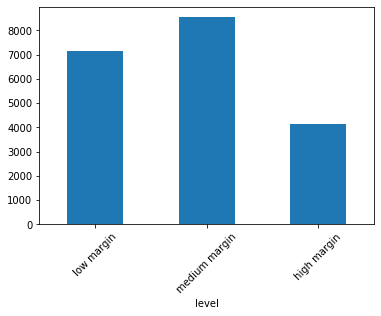

In [1650]:
df_trans_new.groupby('level')['customer_id'].count().plot(kind='bar')
plt.xticks(rotation=45)

most customers buy medium margin product

### Male vs Female

In [1651]:
df_customerdemo_new['past_3_years_bike_related_purchases'].sort_values

<bound method Series.sort_values of 1       46
6       16
8       24
9       58
10      35
        ..
3907    73
3908    38
3909    27
3911    56
3912    67
Name: past_3_years_bike_related_purchases, Length: 2710, dtype: int64>

In [1652]:
df_customerdemo_new

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,agerange
1,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0,18.0,18-29
6,2296,Nathalia,Sanger,Female,16,2002-01-01,Geologist IV,Retail,Affluent Customer,N,ï½ï½¨(Â´âï½â©,No,1.0,18.0,18-29
8,3949,Costa,Sleightholm,Male,24,2001-12-19,Web Designer IV,Manufacturing,High Net Worth,N,-0.5,Yes,1.0,18.0,18-29
9,1402,Hillier,Andraud,Male,58,2001-12-08,Assistant Professor,Telecommunications,Mass Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0,18.0,18-29
10,1519,Marwin,Jeyness,Male,35,2001-11-30,Administrative Assistant IV,Telecommunications,High Net Worth,N,â©testâ©,Yes,1.0,18.0,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,"""'",No,8.0,67.0,60-69
3908,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0,76.0,70+
3909,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0,77.0,70+
3911,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0,85.0,70+


In [1653]:
df_customerdemo_new.to_excel(r'customerdemo.xlsx', sheet_name='df_customerdemo_new', index = False)

In [1654]:
df_NewCustomer_new.to_excel(r'newcustomerlist.xlsx', sheet_name='df_NewCustomer_new', index = False)

In [1655]:
df_customer_add_new.to_excel(r'customeraddress.xlsx', sheet_name='df_customer_add_new', index = False)

In [1656]:
df_trans_new.to_excel(r'transaction.xlsx', sheet_name='df_trans_new', index = False)

In [1657]:
wrong_list = ['F','Femal']
for i in wrong_list:
    df_customerdemo_new.gender = df_customerdemo_new.gender.replace(i,'Female')


In [1658]:
df_customerdemo_new.gender

1         Male
6       Female
8         Male
9         Male
10        Male
         ...  
3907      Male
3908      Male
3909      Male
3911    Female
3912      Male
Name: gender, Length: 2710, dtype: object

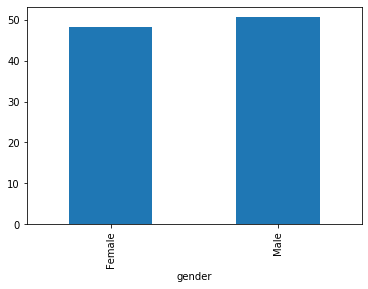

In [1659]:
df_customerdemo_new.groupby('gender')['past_3_years_bike_related_purchases'].mean().plot(kind = 'bar')


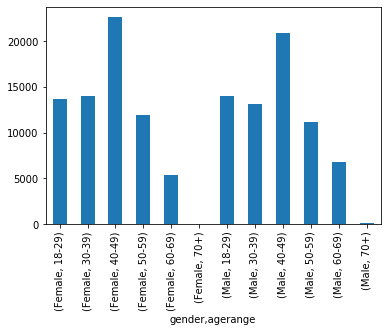

In [1660]:
df_ga =df_customerdemo_new.groupby(['gender','agerange'])['past_3_years_bike_related_purchases'].sum()
df_ga.plot(kind = 'bar')

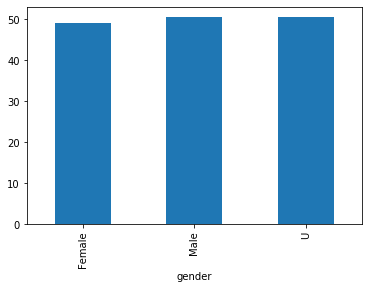

In [1661]:
df_NewCustomer_new.groupby('gender')['past_3_years_bike_related_purchases'].mean().plot(kind = 'bar')

In [1662]:
df_NewCustomer_new.drop(df_NewCustomer_new[df_NewCustomer_new.gender == 'U'].index,inplace = True)

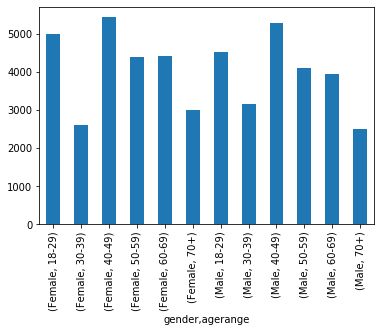

In [1663]:
df_NewCustomer_new.groupby(['gender','agerange'])['past_3_years_bike_related_purchases'].sum().plot(kind = 'bar')

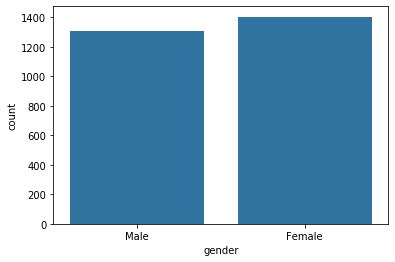

In [1664]:
sb.countplot(data = df_customerdemo_new, x = 'gender',color = sb.color_palette()[0] )

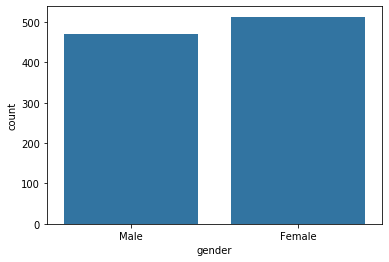

In [1665]:
sb.countplot(data = df_NewCustomer_new , x = 'gender',color = sb.color_palette()[0] )

## Job industry

In [1666]:
df_owncar_old = df_customerdemo_new[df_customerdemo_new.owns_car =='Yes'] 
df_nocar_old = df_customerdemo_new[df_customerdemo_new.owns_car =='No'] 

In [1667]:
df_owncar_old.past_3_years_bike_related_purchases.mean()

49.61142857142857

In [1668]:
df_nocar_old.past_3_years_bike_related_purchases.mean()

49.17022900763359

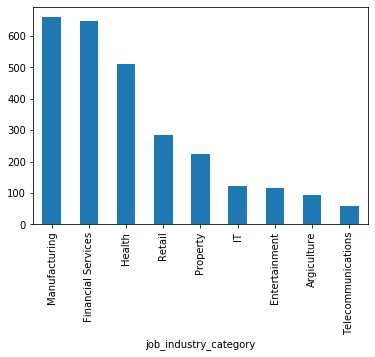

In [1669]:
df_customerdemo_new.groupby('job_industry_category')['customer_id'].count().sort_values(ascending=False).plot(kind = 'bar')

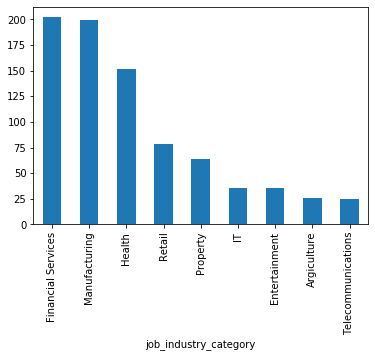

In [1670]:
df_NewCustomer_new.groupby('job_industry_category')['first_name'].count().sort_values(ascending=False).plot(kind = 'bar')

### State Distribution

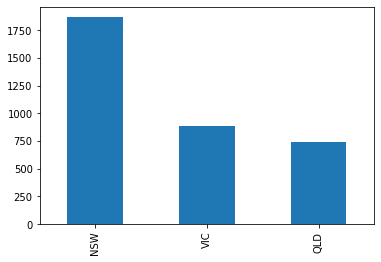

In [1671]:
df_customer_add_new.state.value_counts().plot(kind ='bar')

In [1672]:
df_join = pd.merge(df_customer_add_new, df_customerdemo_new, left_on='customer_id', right_on='customer_id', how='left').drop(['customer_id'], axis=1).dropna()
df_join.head()

,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,agerange
0,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,66.0,60-69
1,6 Meadow Vale Court,2153,NSW,Australia,10,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,39.0,30-39
7,97736 7th Trail,2023,NSW,Australia,12,Mala,Lind,Female,97.0,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,47.0,40-49
9,44339 Golden Leaf Alley,4557,QLD,Australia,4,Sawyere,Flattman,Male,58.0,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,nil,No,8.0,26.0,18-29
10,2 Sutherland Street,3799,VIC,Australia,6,Gabriele,Norcross,Male,38.0,1955-02-15,Developer I,Financial Services,High Net Worth,N,-100,Yes,8.0,65.0,60-69


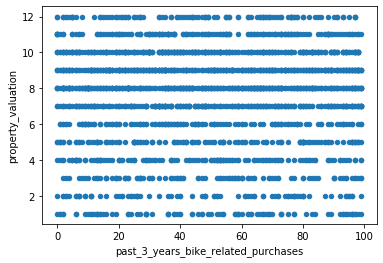

In [1673]:
df_join.plot(x = 'past_3_years_bike_related_purchases', y = 'property_valuation',kind = 'scatter')

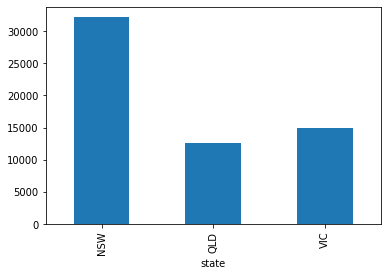

In [1674]:
# NSW is the state owns car more and higher purchases
df_own_car = df_join.query('owns_car == "Yes"')
df_own_car.groupby('state')['past_3_years_bike_related_purchases'].sum().plot(kind = 'bar')

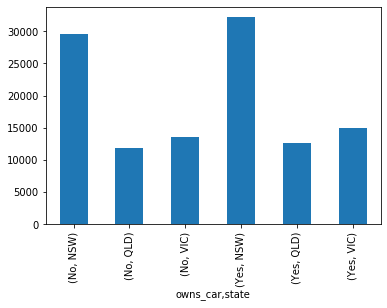

In [1675]:
df_join.groupby(['owns_car','state'])['past_3_years_bike_related_purchases'].sum().plot(kind ='bar')

### RFM Model

#### Recency

In [1676]:
df_trans_new

,transaction_id,product_id,customer_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin,level
0,1,2,2950,2017-02-25,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,24.996503,low margin
1,2,3,3120,2017-05-21,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,81.404467,high margin
2,3,37,402,2017-10-16,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,86.126027,high margin
3,4,88,3135,2017-08-31,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,68.200858,medium margin
4,5,78,787,2017-10-01,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,59.809664,medium margin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,39.999801,medium margin
19996,19997,41,127,2017-11-09,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,24.998801,low margin
19997,19998,87,2284,2017-04-14,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,97.268618,high margin
19998,19999,6,2764,2017-07-03,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,39.999122,medium margin


In [1677]:
import datetime
#days = df_trans_new.transaction_date - datetime.datetime(2020, 5, 1)

df_trans_new['now'] = '2018-01-01'
df_trans_new['now'] = pd.to_datetime(df_trans_new['now'])
df_trans_new['transaction_date'] = pd.to_datetime(df_trans_new['transaction_date'])
df_trans_new['days'] = (df_trans_new['now'] - df_trans_new['transaction_date']).dt.days


In [1678]:
df_trans_new.head()

,transaction_id,product_id,customer_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin,level,now,days
0,1,2,2950,2017-02-25,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,24.996503,low margin,2018-01-01,310
1,2,3,3120,2017-05-21,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,81.404467,high margin,2018-01-01,225
2,3,37,402,2017-10-16,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,86.126027,high margin,2018-01-01,77
3,4,88,3135,2017-08-31,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,68.200858,medium margin,2018-01-01,123
4,5,78,787,2017-10-01,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,59.809664,medium margin,2018-01-01,92


In [1679]:
df_trans_new.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,product_first_sold_date,margin,days
count,19997.000000,19997.000000,19997.000000,19997.000000,19800.000000,19800.000000,19800.000000,19997.00000
mean,9999.856078,45.371456,1737.751613,1107.919641,556.068047,38199.919747,44.610242,183.39916
std,5773.636854,30.750876,1011.221384,582.818787,405.976881,2875.056794,26.422193,105.35532
min,1.000000,0.000000,1.000000,12.010000,7.210000,33259.000000,7.221364,2.00000
25%,5000.000000,18.000000,857.000000,575.270000,215.140000,35667.000000,24.997281,91.00000
50%,10000.000000,44.000000,1736.000000,1163.890000,507.580000,38216.000000,39.999823,182.00000
75%,14999.000000,72.000000,2613.000000,1635.300000,795.100000,40672.000000,67.607993,275.00000
max,20000.000000,100.000000,3500.000000,2091.470000,1759.850000,42710.000000,98.960428,365.00000


In [1680]:

for index, row in df_trans_new.iterrows():
    if row['days'] < 91:
        recency = 4
    elif row['days'] >= 91 and row['days'] < 182:
        recency = 3
    elif row['days'] >=182 and row['days'] < 275:
        recency = 2
    else:
        recency = 1
        
    df_trans_new.at[index,'recency'] = recency  


In [1681]:
df_trans_new

,transaction_id,product_id,customer_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin,level,now,days,recency
0,1,2,2950,2017-02-25,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,24.996503,low margin,2018-01-01,310,1.0
1,2,3,3120,2017-05-21,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,81.404467,high margin,2018-01-01,225,2.0
2,3,37,402,2017-10-16,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,86.126027,high margin,2018-01-01,77,4.0
3,4,88,3135,2017-08-31,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,68.200858,medium margin,2018-01-01,123,3.0
4,5,78,787,2017-10-01,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,59.809664,medium margin,2018-01-01,92,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,39.999801,medium margin,2018-01-01,191,2.0
19996,19997,41,127,2017-11-09,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,24.998801,low margin,2018-01-01,53,4.0
19997,19998,87,2284,2017-04-14,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,97.268618,high margin,2018-01-01,262,2.0
19998,19999,6,2764,2017-07-03,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,39.999122,medium margin,2018-01-01,182,2.0


### Frequency

In [1682]:
df_customer_order = df_trans_new.groupby(['customer_id'])['product_id'].count()

In [1683]:
df_customer_order = df_customer_order.to_frame()
df_customer_order

,product_id
customer_id,
1,11
2,3
3,8
4,2
5,6
...,...
3496,4
3497,3
3498,6


In [1684]:
df_customer_order.rename(columns = {'product_id': 'count of product'}, inplace = True)
df_customer_order.reset_index(inplace=True)
df_customer_order.describe()

,customer_id,count of product
count,3493.000000,3493.000000
mean,1749.916118,5.724878
std,1010.520804,2.325749
min,1.000000,1.000000
25%,876.000000,4.000000
50%,1750.000000,6.000000
75%,2624.000000,7.000000
max,3500.000000,14.000000


In [1685]:
for index, row in df_customer_order.iterrows():
    if row['count of product'] > 7:
        frequency = 4
    elif row['count of product'] <= 7 and row['count of product'] > 6:
        frequency = 3
    elif row['count of product'] <= 6 and row['count of product'] > 4:
        frequency = 2
    else:
        frequency = 1
        
    df_customer_order.at[index,'Frequency'] = frequency
    
df_customer_order

,customer_id,count of product,Frequency
0,1,11,4.0
1,2,3,1.0
2,3,8,4.0
3,4,2,1.0
4,5,6,2.0
...,...,...,...
3488,3496,4,1.0
3489,3497,3,1.0
3490,3498,6,2.0
3491,3499,7,3.0


In [1686]:
df_customer_order
df_customer_trans = pd.merge(df_customer_order,df_trans_new,
                 on='customer_id', 
                 how='inner')
df_customer_trans
# df_trans_new

,customer_id,count of product,Frequency,transaction_id,product_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin,level,now,days,recency
0,1,11,4.0,94,86,2017-12-23,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,46.921020,medium margin,2018-01-01,9,4.0
1,1,11,4.0,3765,38,2017-04-06,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,47.607336,medium margin,2018-01-01,270,2.0
2,1,11,4.0,5157,47,2017-05-11,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,11.000174,low margin,2018-01-01,235,2.0
3,1,11,4.0,9785,72,2017-01-05,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,25.000000,low margin,2018-01-01,361,1.0
4,1,11,4.0,13424,2,2017-02-21,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,24.996503,low margin,2018-01-01,314,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,3500,6,2.0,6309,69,2017-01-09,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,24.999369,low margin,2018-01-01,357,1.0
19993,3500,6,2.0,8416,74,2017-02-16,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,67.354467,medium margin,2018-01-01,319,1.0
19994,3500,6,2.0,8562,33,2017-08-08,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,11.000122,low margin,2018-01-01,146,3.0
19995,3500,6,2.0,14870,22,2017-01-11,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,24.991714,low margin,2018-01-01,355,1.0


In [1687]:
df_trans_new.head()


,transaction_id,product_id,customer_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,margin,level,now,days,recency
0,1,2,2950,2017-02-25,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,24.996503,low margin,2018-01-01,310,1.0
1,2,3,3120,2017-05-21,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,81.404467,high margin,2018-01-01,225,2.0
2,3,37,402,2017-10-16,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,86.126027,high margin,2018-01-01,77,4.0
3,4,88,3135,2017-08-31,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,68.200858,medium margin,2018-01-01,123,3.0
4,5,78,787,2017-10-01,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,59.809664,medium margin,2018-01-01,92,3.0


In [1688]:
df_trans_new['profit'] = df_trans_new['list_price'] - df_trans_new['standard_cost']

In [1689]:
df_trans_profit = df_trans_new.groupby(['customer_id'])['profit'].sum()

In [1690]:
df_trans_profit = df_trans_profit.to_frame()
df_trans_profit

,profit
customer_id,
1,3018.09
2,2226.26
3,3362.81
4,220.57
5,2394.94
...,...
3496,2045.84
3497,1648.32
3498,3147.33


In [1691]:
df_trans_profit.reset_index(inplace=True)
df_trans_profit

,customer_id,profit
0,1,3018.09
1,2,2226.26
2,3,3362.81
3,4,220.57
4,5,2394.94
...,...,...
3488,3496,2045.84
3489,3497,1648.32
3490,3498,3147.33
3491,3499,4955.25


In [1692]:
df_trans_profit.describe()

,customer_id,profit
count,3493.000000,3493.000000
mean,1749.916118,3129.119519
std,1010.520804,1770.128368
min,1.000000,15.080000
25%,876.000000,1841.730000
50%,1750.000000,2862.330000
75%,2624.000000,4183.810000
max,3500.000000,11668.950000


In [1693]:

for index, row in df_trans_profit.iterrows():
    if row['profit'] > 4183:
        monetary = 4
    elif row['profit'] <= 4183 and row['profit'] > 2862:
        monetary = 3
    elif row['profit'] <= 2862 and row['profit'] > 1841:
        monetary = 2
    else:
        monetary = 1
        
    df_trans_profit.at[index,'monetary'] = monetary
    
df_trans_profit

,customer_id,profit,monetary
0,1,3018.09,3.0
1,2,2226.26,2.0
2,3,3362.81,3.0
3,4,220.57,1.0
4,5,2394.94,2.0
...,...,...,...
3488,3496,2045.84,2.0
3489,3497,1648.32,1.0
3490,3498,3147.33,3.0
3491,3499,4955.25,4.0


In [1694]:
df_customer_trans_new = pd.merge(df_customer_trans,df_trans_profit,
                 on='customer_id', 
                 how='inner')
df_customer_trans_new

,customer_id,count of product,Frequency,transaction_id,product_id,transaction_date,order_status,brand,product_line,product_class,...,list_price,standard_cost,product_first_sold_date,margin,level,now,days,recency,profit,monetary
0,1,11,4.0,94,86,2017-12-23,Approved,OHM Cycles,Standard,medium,...,235.63,125.07,38482.0,46.921020,medium margin,2018-01-01,9,4.0,3018.09,3.0
1,1,11,4.0,3765,38,2017-04-06,Approved,Solex,Standard,medium,...,1577.53,826.51,39526.0,47.607336,medium margin,2018-01-01,270,2.0,3018.09,3.0
2,1,11,4.0,5157,47,2017-05-11,Approved,Trek Bicycles,Road,low,...,1720.70,1531.42,37823.0,11.000174,low margin,2018-01-01,235,2.0,3018.09,3.0
3,1,11,4.0,9785,72,2017-01-05,Approved,Norco Bicycles,Standard,medium,...,360.40,270.30,37873.0,25.000000,low margin,2018-01-01,361,1.0,3018.09,3.0
4,1,11,4.0,13424,2,2017-02-21,Approved,Solex,Standard,medium,...,71.49,53.62,38573.0,24.996503,low margin,2018-01-01,314,1.0,3018.09,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,3500,6,2.0,6309,69,2017-01-09,Approved,Giant Bicycles,Road,medium,...,792.90,594.68,33879.0,24.999369,low margin,2018-01-01,357,1.0,1785.86,1.0
19993,3500,6,2.0,8416,74,2017-02-16,Approved,WeareA2B,Standard,medium,...,1228.07,400.91,36668.0,67.354467,medium margin,2018-01-01,319,1.0,1785.86,1.0
19994,3500,6,2.0,8562,33,2017-08-08,Approved,Giant Bicycles,Standard,medium,...,1311.44,1167.18,33888.0,11.000122,low margin,2018-01-01,146,3.0,1785.86,1.0
19995,3500,6,2.0,14870,22,2017-01-11,Approved,WeareA2B,Standard,medium,...,60.34,45.26,34165.0,24.991714,low margin,2018-01-01,355,1.0,1785.86,1.0


In [1695]:

df_customer_trans_new['RFM Score']= df_customer_trans_new['recency']*100 + df_customer_trans_new['Frequency']*10 + df_customer_trans_new['monetary']

df_customer_trans_new2 = df_customer_trans_new.groupby('customer_id')['RFM Score'].mean().to_frame()

df_customer_trans_new2.reset_index(inplace=True)

In [1696]:
df_customer_trans_new2

,customer_id,RFM Score
0,1,261.181818
1,2,245.333333
2,3,255.500000
3,4,211.000000
4,5,255.333333
...,...,...
3488,3496,187.000000
3489,3497,344.333333
3490,3498,206.333333
3491,3499,219.714286


In [1697]:
df_customer_trans_new2['RFM Score'].describe()

count    3493.000000
mean      274.517834
std        53.389443
min       111.000000
25%       242.000000
50%       276.857143
75%       311.000000
max       423.000000
Name: RFM Score, dtype: float64

In [1698]:
for index, row in df_customer_trans_new2.iterrows():
    if row['RFM Score'] > 311:
        RFM = 'Platinum'
    elif row['RFM Score'] <= 311 and row['RFM Score'] > 276:
        RFM = 'Gold'
    elif row['RFM Score'] <= 242 and row['RFM Score'] > 111:
        RFM = 'Silver'
    else:
        RFM = 'Not Valued'
        
    df_customer_trans_new2.at[index,'Customer Level'] = RFM
    


In [1699]:
df_customer_valuelist = df_customer_trans_new2[['customer_id','Customer Level']]
df_customer_valuelist

,customer_id,Customer Level
0,1,Not Valued
1,2,Not Valued
2,3,Not Valued
3,4,Silver
4,5,Not Valued
...,...,...
3488,3496,Silver
3489,3497,Platinum
3490,3498,Silver
3491,3499,Silver


In [1700]:
df_customer_valuelist.to_excel('customer_valuelist.xlsx')

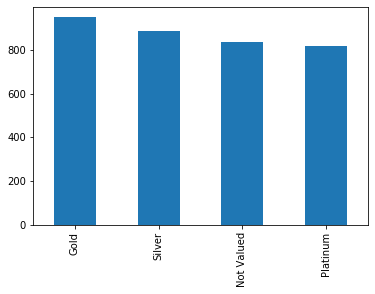

In [1701]:
df_customer_valuelist['Customer Level'].value_counts().plot(kind ='bar')

In [1702]:
df_customer_trans_new.columns

Index(['customer_id', 'count of product', 'Frequency', 'transaction_id',
       'product_id', 'transaction_date', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'margin', 'level', 'now',
       'days', 'recency', 'profit', 'monetary', 'RFM Score'],
      dtype='object')

In [1703]:
df_NewCustomer_new = df_NewCustomer_new.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Rank','Value','address','postcode','country'],axis = 1)


In [1704]:
df_NewCustomer_new.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'state', 'property_valuation', 'age', 'agerange'],
      dtype='object')

In [1705]:
df_oldcustomer = pd.merge(df_customer_trans_new2,df_customerdemo_new,
                 on='customer_id', 
                 how='inner')

In [1706]:
df_oldcustomer.isnull().sum()

customer_id                             0
RFM Score                               0
Customer Level                          0
first_name                              0
last_name                              71
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                     0
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
default                                 0
owns_car                                0
tenure                                  0
age                                     0
agerange                                0
dtype: int64

In [1707]:
df_oldcustomer.drop(['default'],axis =1, inplace = True)


In [1708]:
df_oldcustomer = pd.merge(df_customer_add_new,df_oldcustomer,
                 on='customer_id', 
                 how='inner')

In [1709]:
df_oldcustomer.drop(['address','postcode','country','customer_id','Customer Level'],axis=1,inplace = True)

In [1710]:
df_oldcustomer.columns

Index(['state', 'property_valuation', 'RFM Score', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'agerange'],
      dtype='object')

In [1711]:
df_oldcustomer.head(2)

,state,property_valuation,RFM Score,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,agerange
0,NSW,10,261.181818,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,60-69
1,NSW,10,245.333333,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0,30-39


In [1712]:
object_cols = ['state','gender','wealth_segment','deceased_indicator','owns_car']

In [1713]:
low_cardinality_cols = [col for col in object_cols if df_oldcustomer[col].nunique() < 10]
print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)

Categorical columns that will be one-hot encoded: ['state', 'gender', 'wealth_segment', 'deceased_indicator', 'owns_car']


In [1714]:
df_oldcustomer['label'] = 'train'
df_NewCustomer_new['label'] = 'test'
# Concat
concat_df = pd.concat([df_oldcustomer, df_NewCustomer_new])
concat_df.drop(['job_title','job_industry_category'],axis = 1,inplace = True)
concat_df.isnull().sum()

state                                    0
property_valuation                       0
RFM Score                              983
first_name                               0
last_name                              100
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     16
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
age                                     16
agerange                                16
label                                    0
dtype: int64

In [1715]:
from sklearn.preprocessing import LabelEncoder


In [1716]:
label_encoder = LabelEncoder()
for col in object_cols:
    concat_df[col] = label_encoder.fit_transform(concat_df[col])
OH_cols_test.index = concat_df.index
num_X_test = concat_df.drop(object_cols, axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [1717]:
OH_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   property_valuation                   3382 non-null   int64         
 1   RFM Score                            2399 non-null   float64       
 2   first_name                           3382 non-null   object        
 3   last_name                            3282 non-null   object        
 4   past_3_years_bike_related_purchases  3382 non-null   int64         
 5   DOB                                  3366 non-null   datetime64[ns]
 6   tenure                               3382 non-null   float64       
 7   age                                  3366 non-null   float64       
 8   agerange                             3366 non-null   category      
 9   label                                3382 non-null   object        
 10  0            

In [1718]:
# Split your data
df_oldcustomer = OH_X_test[OH_X_test['label'] == 'train']
df_NewCustomer_new = OH_X_test[OH_X_test['label'] == 'test']

# Drop your labels
df_oldcustomer = df_oldcustomer.drop('label', axis=1)
df_NewCustomer_new = df_NewCustomer_new.drop('label', axis=1)

In [1719]:
df_oldcustomer

,property_valuation,RFM Score,first_name,last_name,past_3_years_bike_related_purchases,DOB,tenure,age,agerange,0,...,2,3,4,5,6,7,8,9,10,11
0,10,261.181818,Laraine,Medendorp,93,1953-10-12,11.0,66.0,60-69,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,10,245.333333,Eli,Bockman,81,1980-12-16,16.0,39.0,30-39,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,12,255.333333,Mala,Lind,97,1973-03-10,8.0,47.0,40-49,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,318.714286,Sawyere,Flattman,58,1994-07-21,8.0,26.0,18-29,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,6,262.571429,Gabriele,Norcross,38,1955-02-15,8.0,65.0,60-69,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,10,239.666667,Jeffie,Eakly,30,1964-02-29,18.0,56.0,50-59,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2395,10,312.000000,Robers,Richen,72,1998-12-24,1.0,21.0,18-29,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2396,9,218.714286,Constantine,Frissell,57,1987-07-12,8.0,33.0,30-39,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2397,9,187.000000,Danya,Burnyeat,99,1986-04-25,19.0,34.0,30-39,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [1720]:
y = df_oldcustomer['RFM Score']
# features = ['property_valuation','past_3_years_bike_related_purchases','tenure','age',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
features = []
features_exclude = ['RFM Score', 'first_name', 'last_name', 'DOB', 'agerange']
for col in df_oldcustomer.columns:
#     if ('RFM Score'or'first_name'or'last_name' or 'DOB' or 'agerange' not in str(col)):
    if not any(exc in str(col) for exc in features_exclude):
        features.append(col)
        
X = df_oldcustomer[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=2)

In [1721]:
features

['property_valuation',
 'past_3_years_bike_related_purchases',
 'tenure',
 'age',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11]

In [1722]:
train_X

,property_valuation,past_3_years_bike_related_purchases,tenure,age,0,1,2,3,4,5,6,7,8,9,10,11
1114,9,89,20.0,31.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
826,10,23,2.0,22.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
239,6,19,11.0,43.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1288,1,68,6.0,42.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
758,9,2,6.0,62.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,11,16,16.0,45.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
674,8,73,6.0,34.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1099,11,32,4.0,42.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2347,8,40,17.0,61.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


### Linear Regression

In [1723]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)
reg_pred = reg.predict(val_X)

In [1724]:
print('Mean Absolute Error (MAE):', mean_absolute_error(val_y, reg_pred))
print('Mean Squared Error (MSE):', mean_squared_error(val_y, reg_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(val_y, reg_pred)))
mape = np.mean(np.abs((val_y - reg_pred) / np.abs(val_y)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 40.81055436912371
Mean Squared Error (MSE): 2694.8877276383078
Root Mean Squared Error (RMSE): 51.91230805539576
Mean Absolute Percentage Error (MAPE): 16.63
Accuracy: 83.37


### Random Forest Model

In [1725]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(n_estimators=100,max_features=2, max_depth=2, random_state=2)

# fit your model
rf_model.fit(train_X, train_y)
melb_preds = rf_model.predict(val_X)
# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_y, melb_preds)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

# Check your answer


Validation MAE for Random Forest Model: 40.47165892783448


In [1726]:
import numpy as np
from sklearn import metrics

In [1727]:
print('Mean Absolute Error (MAE):', mean_absolute_error(val_y, melb_preds))
print('Mean Squared Error (MSE):', mean_squared_error(val_y, melb_preds))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(val_y, melb_preds)))
mape = np.mean(np.abs((val_y - melb_preds) / np.abs(val_y)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 40.47165892783448
Mean Squared Error (MSE): 2669.1449018485687
Root Mean Squared Error (RMSE): 51.66376778602746
Mean Absolute Percentage Error (MAPE): 16.5
Accuracy: 83.5


### Boosted Model

In [1728]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor

In [1729]:
gb_clf2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.5, max_features=2, max_depth=2, random_state=2)
gb_clf2.fit(train_X, train_y)
predictions_GB = gb_clf2.predict(val_X)

In [1730]:
print('Mean Absolute Error (MAE):', mean_absolute_error(val_y, predictions_GB))
print('Mean Squared Error (MSE):', mean_squared_error(val_y, predictions_GB))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(val_y, predictions_GB)))
mape = np.mean(np.abs((val_y - predictions_GB) / np.abs(val_y)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 41.47853675731635
Mean Squared Error (MSE): 2807.4463463715815
Root Mean Squared Error (RMSE): 52.98534086303099
Mean Absolute Percentage Error (MAPE): 16.88
Accuracy: 83.12


### Model comparsion

Random Forest has higher accuracy

In [1731]:
df_NewCustomer_new.drop(['RFM Score','first_name','last_name','DOB','agerange'],axis =1,inplace = True)


In [1732]:
df_NewCustomer_new = df_NewCustomer_new.replace(np.nan,df_NewCustomer_new['age'].median())

In [1733]:
preds_n = rf_model.predict(df_NewCustomer_new)

In [1734]:
preds_n

array([268.61174091, 268.12633929, 264.67286543, 267.55326947,
       267.77951221, 271.78370068, 268.04698503, 270.62120377,
       269.54612802, 271.47308534, 266.54787616, 268.67323555,
       269.77785791, 269.48962276, 270.36149235, 268.35875743,
       270.28137704, 268.65477492, 269.68513902, 271.52246149,
       270.40515801, 270.13617027, 268.00992692, 271.66154102,
       269.88986565, 271.40015314, 270.85073068, 270.1304766 ,
       269.39545109, 268.42562565, 270.37060182, 270.5910867 ,
       269.88595142, 270.21120842, 268.77973184, 270.8913768 ,
       269.4786068 , 269.02127352, 270.07868091, 269.19231232,
       269.06150845, 265.03839848, 269.73498916, 268.90131913,
       269.09951551, 269.16399753, 271.29572662, 270.92509074,
       269.59460383, 270.17385209, 267.444843  , 269.41853025,
       269.24891837, 269.55513611, 268.79550873, 269.57365678,
       270.07677144, 268.76334208, 269.49199035, 271.37517066,
       271.22891722, 270.09228499, 272.40101468, 272.51

In [1735]:
df_NewCustomer_new['RFM Score'] = pd.Series(preds_n)

In [1736]:
df_NewCustomer_new['RFM Score']

0      268.611741
1      268.126339
2      264.672865
3      267.553269
4      267.779512
          ...    
995           NaN
996           NaN
997           NaN
998           NaN
999           NaN
Name: RFM Score, Length: 983, dtype: float64

In [1738]:
df_NewCustomer_new['first_name'] = df_NewCustomer['first_name']
df_NewCustomer_new['last_name'] = df_NewCustomer['last_name']

In [1741]:
df_NewCustomer_new.drop([0,1,2,3,4,5,6,7,8,9,10,11],axis =1,inplace = True)


In [1742]:
df_NewCustomer_new.isnull().sum()

property_valuation                      0
past_3_years_bike_related_purchases     0
tenure                                  0
age                                     0
RFM Score                              16
first_name                              0
last_name                              29
dtype: int64

In [1743]:
df_NewCustomer_new.dropna()

,property_valuation,past_3_years_bike_related_purchases,tenure,age,RFM Score,first_name,last_name
0,6,86,14.0,82.0,268.611741,Chickie,Brister
1,11,69,16.0,82.0,268.126339,Morly,Genery
2,5,10,10.0,82.0,264.672865,Ardelis,Forrester
3,1,64,5.0,82.0,267.553269,Lucine,Stutt
4,9,34,19.0,82.0,267.779512,Melinda,Hadlee
...,...,...,...,...,...,...,...
978,5,77,13.0,18.0,272.028473,Artemis,Swanson
979,12,93,9.0,18.0,273.707492,Daryle,Marginson
980,8,71,3.0,18.0,273.376026,Tyne,Anshell
981,1,83,22.0,18.0,273.853813,Leona,Shorrock


In [1744]:
df_NewCustomer_new.describe()

,property_valuation,past_3_years_bike_related_purchases,tenure,age,RFM Score
count,983.000000,983.000000,983.000000,983.000000,967.000000
mean,7.406918,49.824008,11.459817,48.945066,272.412290
std,2.758293,27.786108,5.006123,16.981151,1.524815
min,1.000000,0.000000,1.000000,18.000000,264.672865
25%,6.000000,27.000000,8.000000,37.000000,271.591530
50%,8.000000,51.000000,11.000000,48.000000,272.683893
75%,9.000000,72.000000,15.000000,62.000000,273.484922
max,12.000000,99.000000,22.000000,82.000000,276.087331


In [1745]:
df_NewCustomer_new.sort_values(by=['RFM Score'],ascending=False).head(20)

,property_valuation,past_3_years_bike_related_purchases,tenure,age,RFM Score,first_name,last_name
953,11,74,15.0,20.0,276.087331,Noami,Cokly
443,2,59,6.0,51.0,275.684917,Gleda,Howerd
658,5,25,18.0,41.0,275.606647,Nicol,Bertot
944,9,91,5.0,21.0,275.596392,Sim,Constantinou
320,7,78,7.0,58.0,275.440531,Paxon,Roomes
480,7,25,10.0,49.0,275.368406,Fitzgerald,Hellikes
573,7,49,18.0,45.0,275.290468,Charmain,Styles
537,8,62,15.0,46.0,275.230203,Dwain,Hatch
965,8,33,1.0,20.0,275.213207,Inglis,Pickaver
774,10,46,10.0,32.0,275.202668,Elvin,Trayhorn


In [1749]:
df_NewCustomer_new.describe()

,property_valuation,past_3_years_bike_related_purchases,tenure,age,RFM Score,Customer Level
count,983.000000,983.000000,983.000000,983.000000,967.000000,983.000000
mean,7.406918,49.824008,11.459817,48.945066,272.412290,2.040692
std,2.758293,27.786108,5.006123,16.981151,1.524815,0.267698
min,1.000000,0.000000,1.000000,18.000000,264.672865,2.000000
25%,6.000000,27.000000,8.000000,37.000000,271.591530,2.000000
50%,8.000000,51.000000,11.000000,48.000000,272.683893,2.000000
75%,9.000000,72.000000,15.000000,62.000000,273.484922,2.000000
max,12.000000,99.000000,22.000000,82.000000,276.087331,4.000000


In [1750]:
for index, row in df_NewCustomer_new.iterrows():
    if row['RFM Score'] > 273.48:
        RFM = 1
    elif row['RFM Score'] <= 273.48 and row['RFM Score'] > 272.68:
        RFM = 2
    elif row['RFM Score'] <= 272.68 and row['RFM Score'] > 271.59:
        RFM = 3
    else:
        RFM = 4
        
    df_NewCustomer_new.at[index,'Customer Level'] = RFM
    


In [1751]:
df_NewCustomer_new.sample(10)

,property_valuation,past_3_years_bike_related_purchases,tenure,age,RFM Score,first_name,last_name,Customer Level
2,5,10,10.0,82.0,264.672865,Ardelis,Forrester,4.0
161,11,23,10.0,67.0,270.831978,Amil,Ennor,4.0
334,10,62,15.0,57.0,270.503081,Vitia,Axtens,4.0
135,7,89,19.0,69.0,269.672449,Padraig,Snel,4.0
516,9,75,5.0,47.0,273.449595,Isa,Fominov,2.0
571,9,81,21.0,45.0,273.237064,Esdras,Birchett,2.0
15,8,88,5.0,81.0,268.358757,Dukie,Swire,4.0
776,9,73,14.0,32.0,274.055305,Sonni,Milligan,1.0
529,11,56,19.0,46.0,270.490290,Ivy,Farr,4.0
310,11,39,10.0,59.0,273.068475,Natividad,Balducci,2.0
